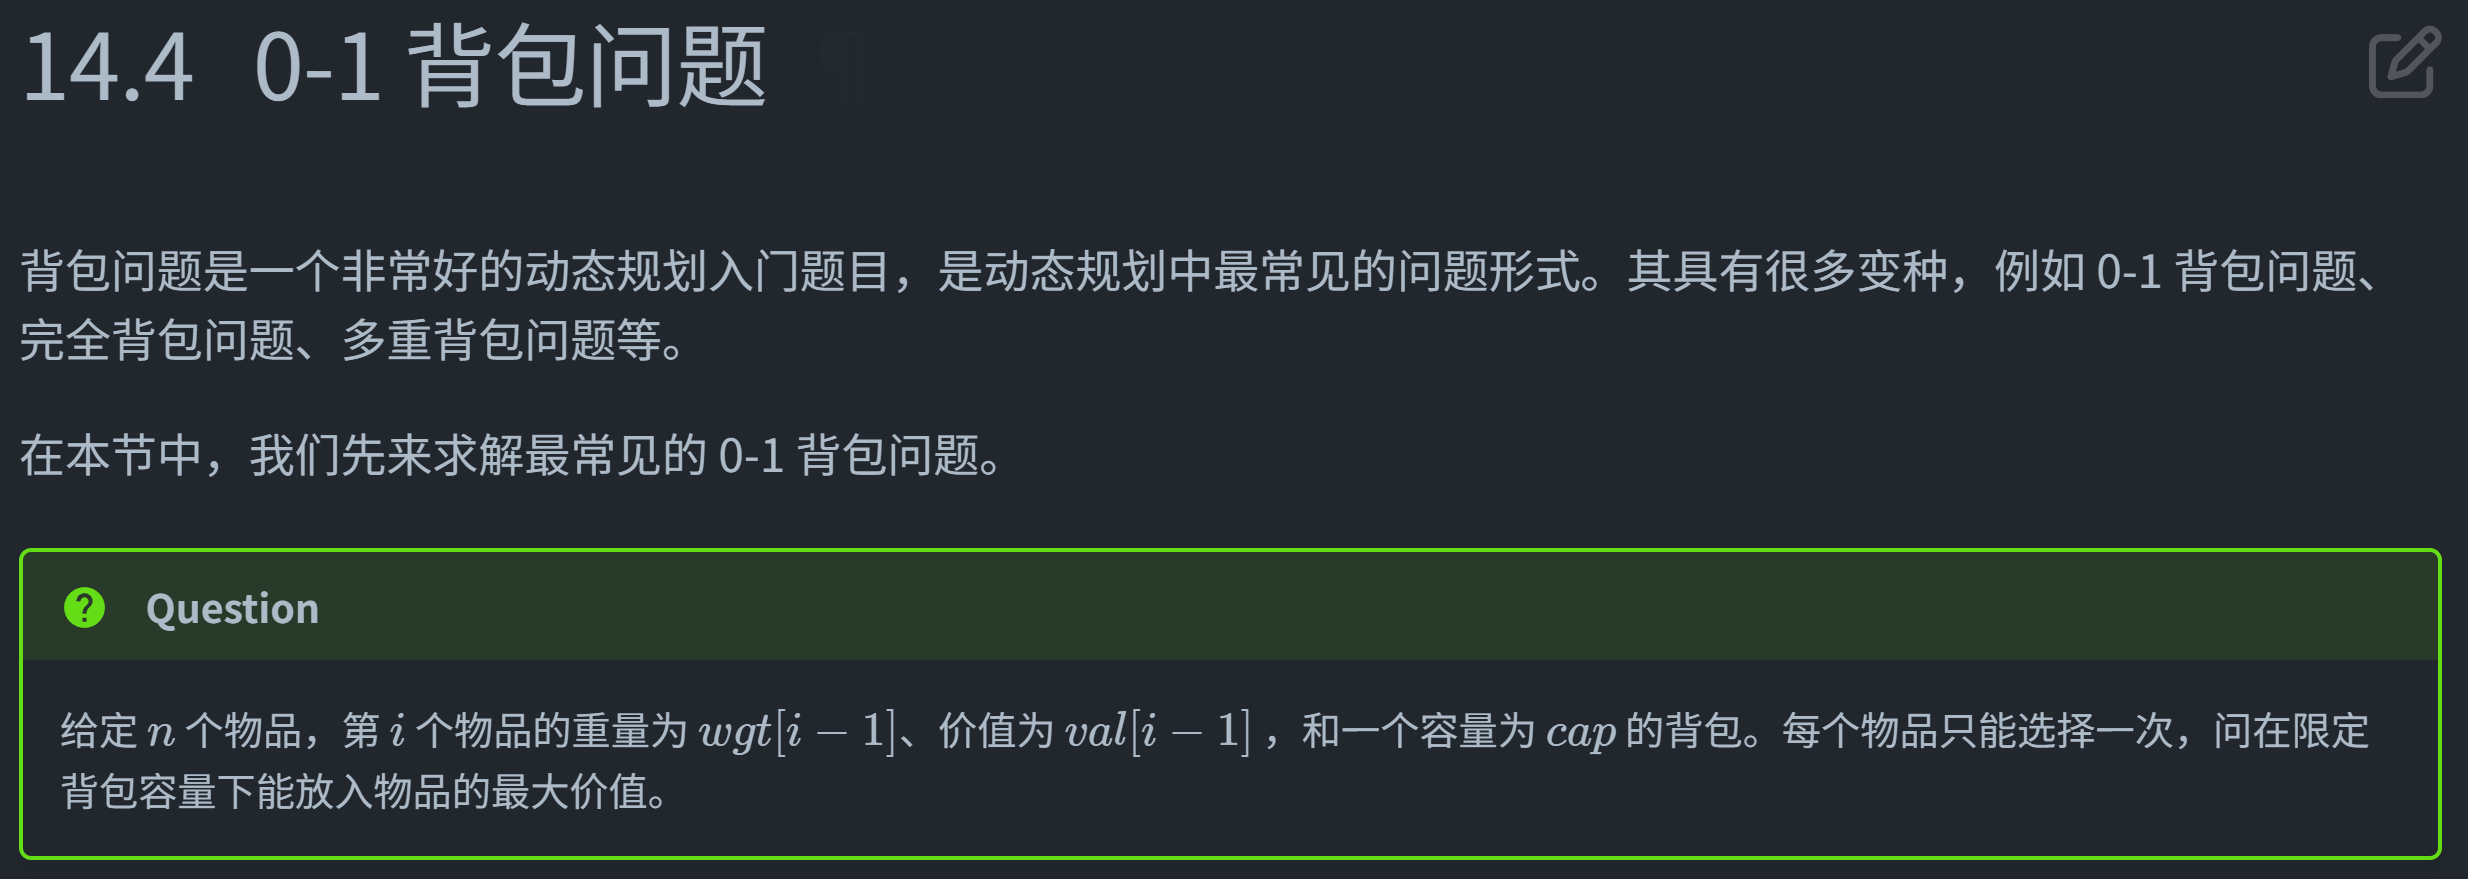
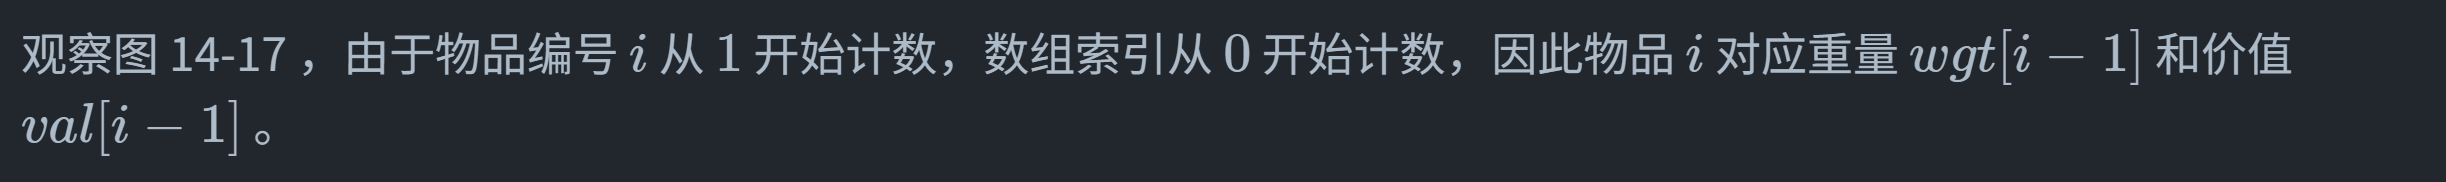
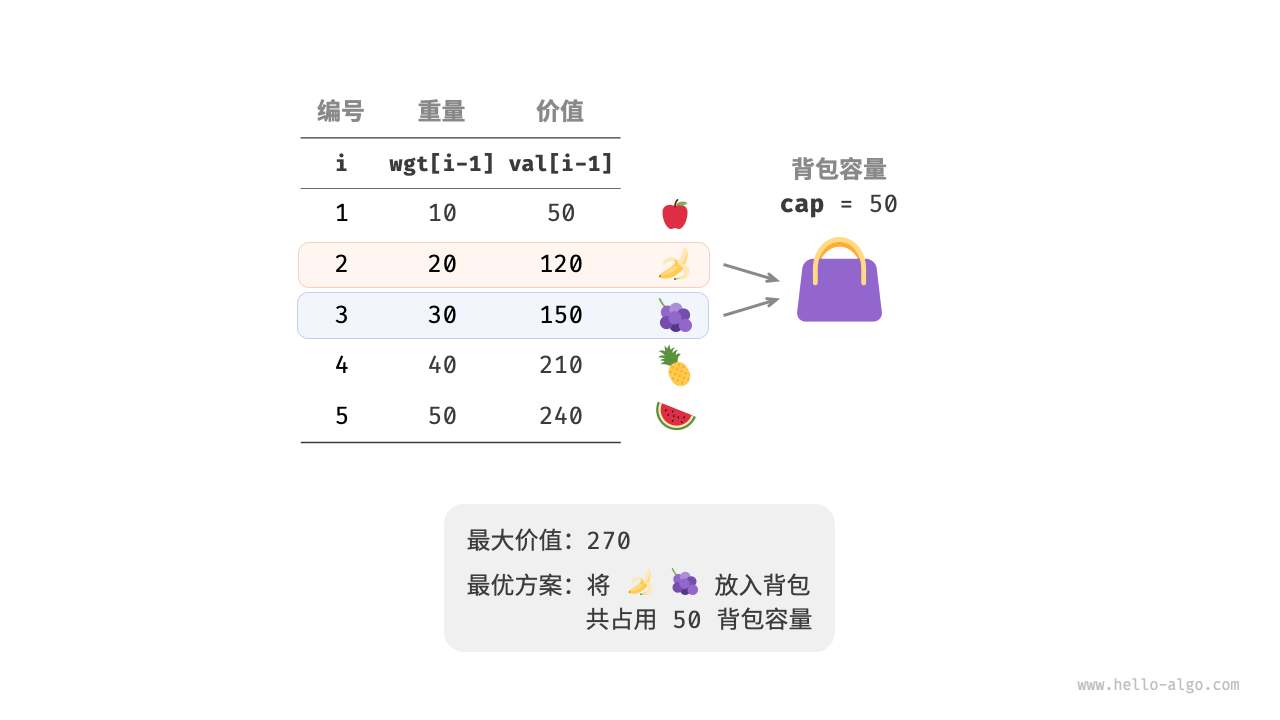
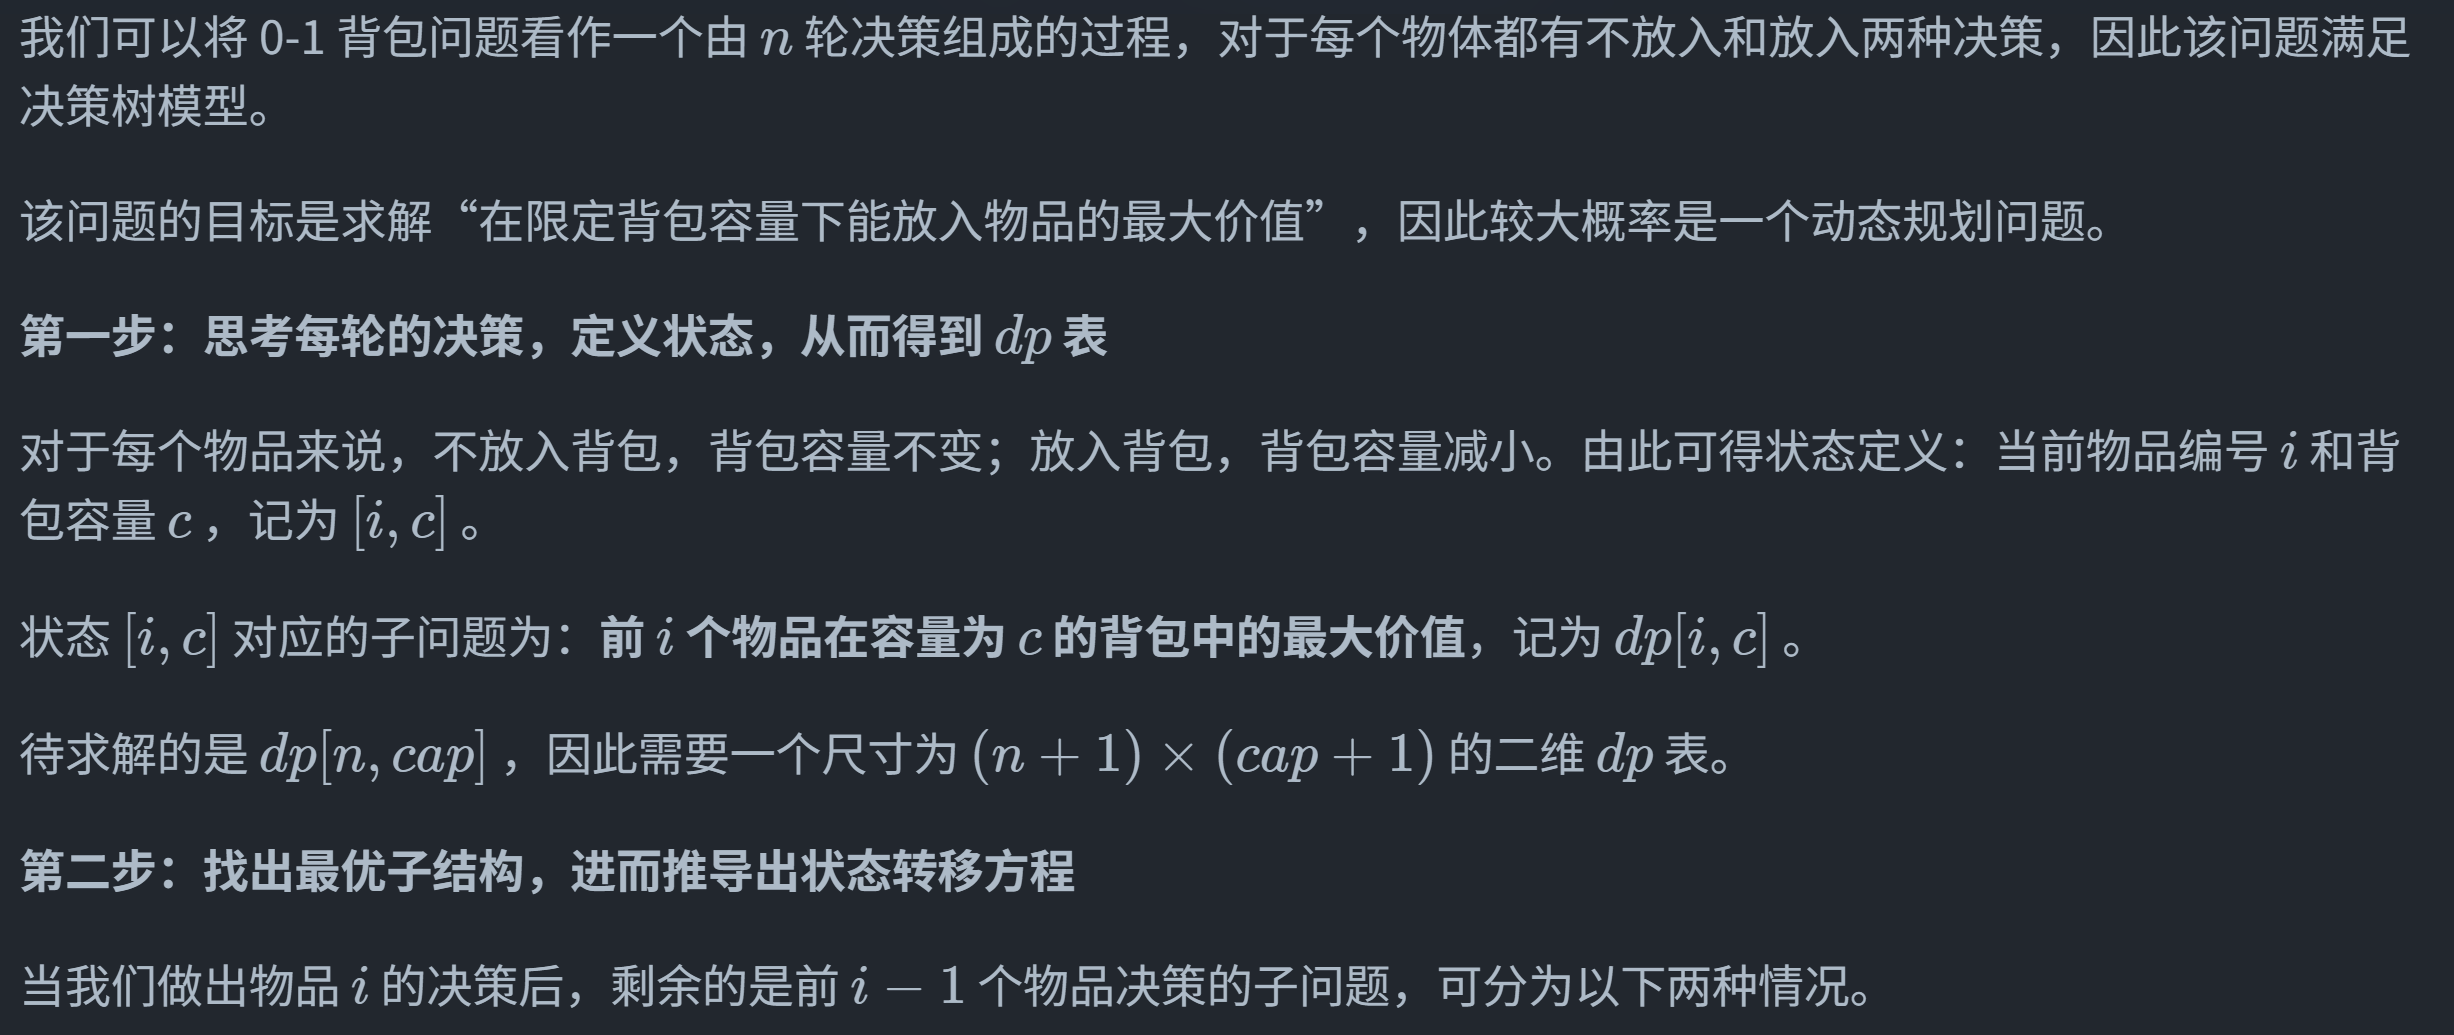
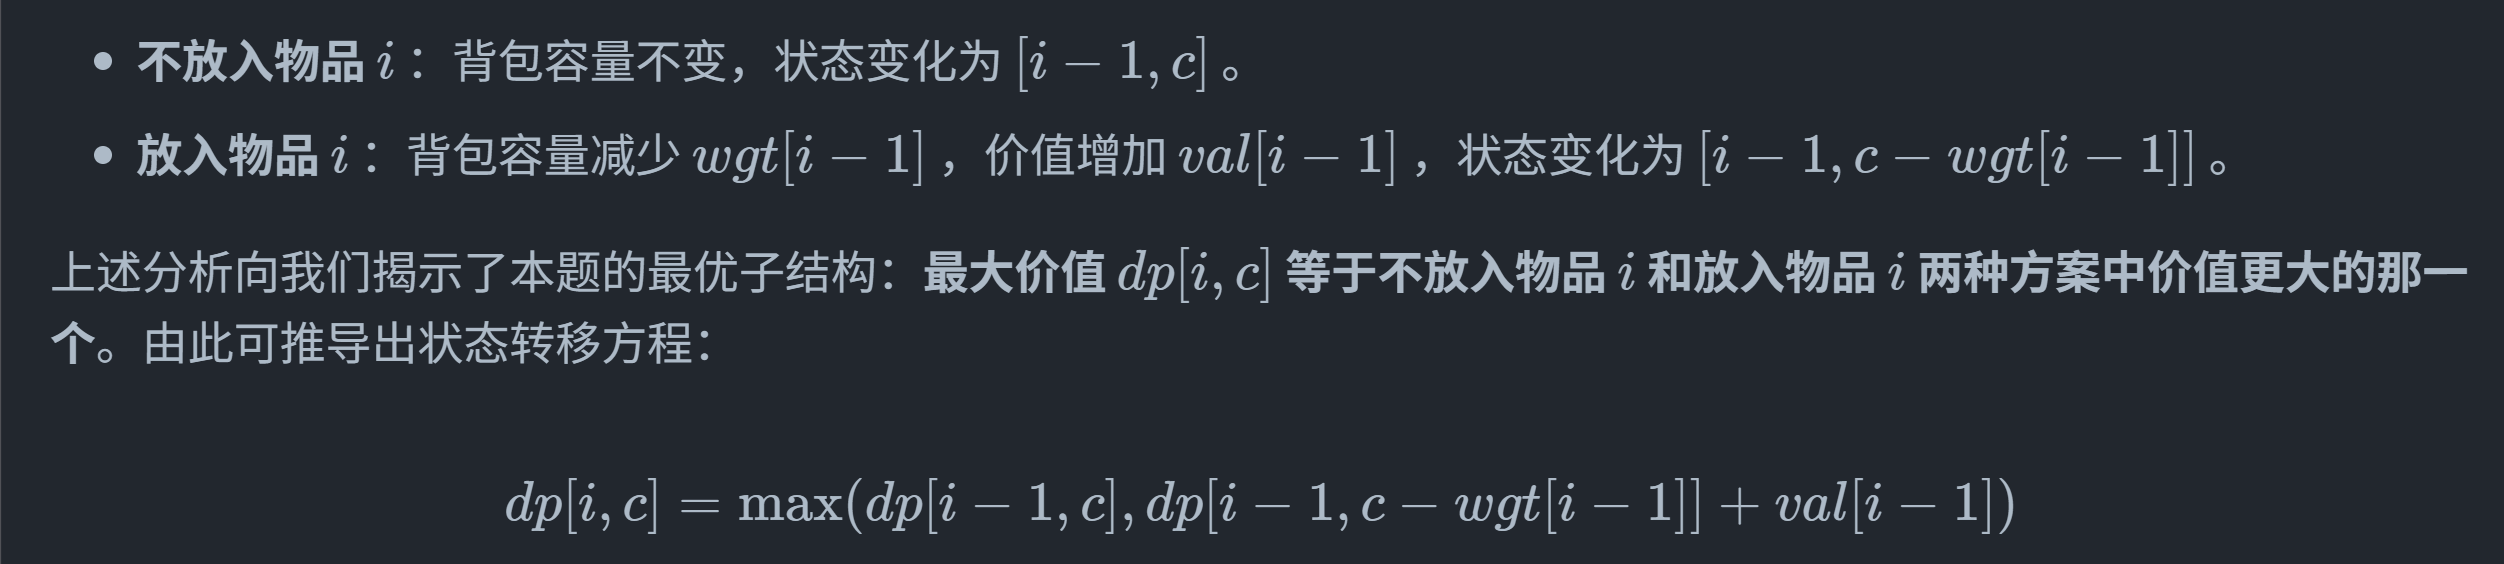
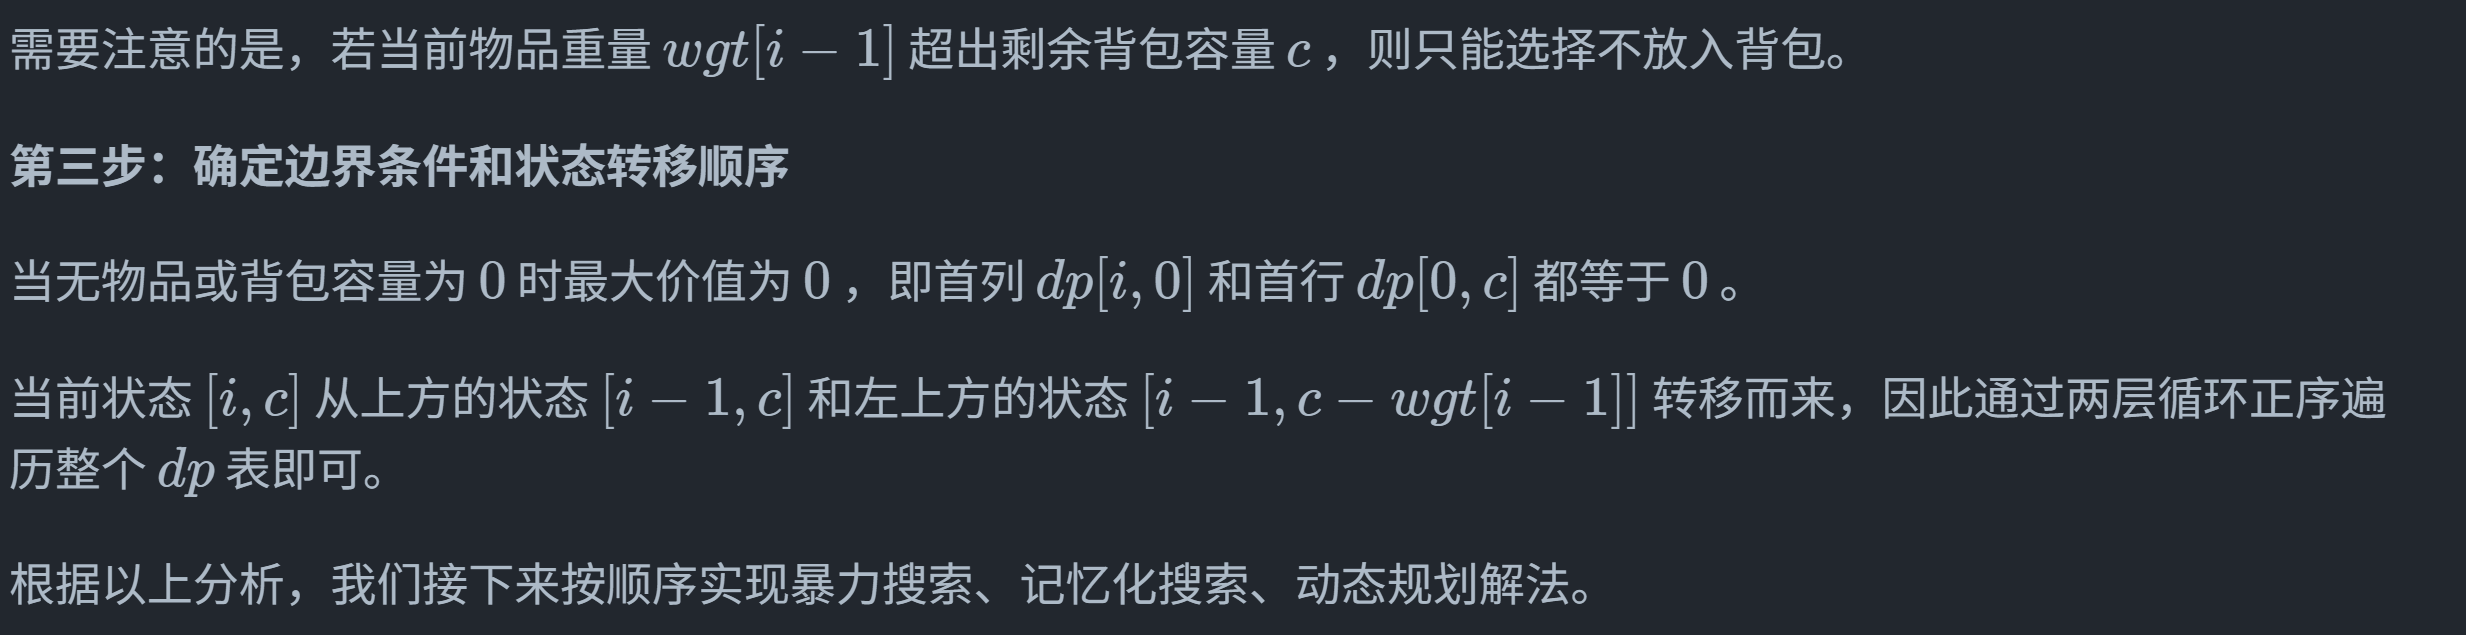
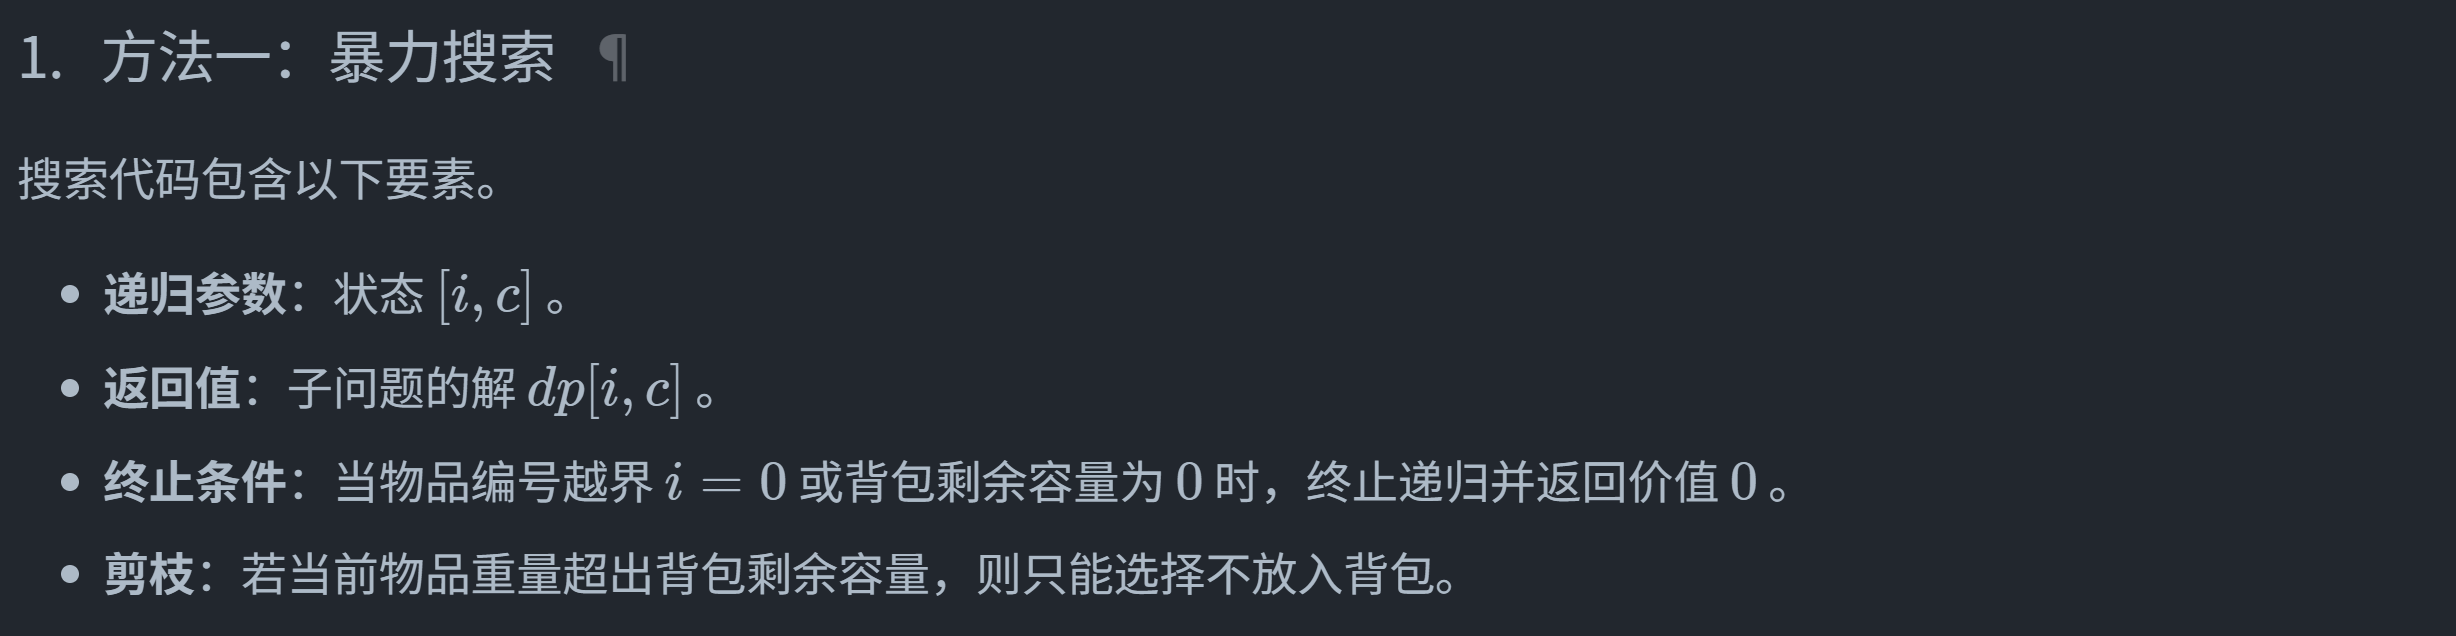

In [1]:
def knapsack_dfs(wgt: list[int], val: list[int], i: int, c: int) -> int:
    """0-1 背包：暴力搜索"""
    # 若已选完所有物品或背包无剩余容量，则返回价值 0
    if c == 0 or i == 0:
        return 0
    # 若超过背包容量，则只能选择不放入背包
    if wgt[i - 1] > c:
        return knapsack_dfs(wgt, val, i - 1, c)
    # 计算不放入和放入物品 i 的最大价值
    no = knapsack_dfs(wgt, val, i - 1, c)
    yes = knapsack_dfs(wgt, val, i - 1, c - wgt[i - 1]) + val[i - 1]
    # 返回两种方案中价值更大的一个
    return max(no, yes)

In [2]:
"""Driver Code"""
if __name__ == "__main__":
    wgt = [10, 20, 30, 40, 50]
    val = [50, 120, 150, 210, 240]
    cap = 50
    n = len(wgt)

    # 暴力搜索
    res = knapsack_dfs(wgt, val, n, cap)
    print(f"不超过背包容量的最大物品价值为 {res}")

不超过背包容量的最大物品价值为 270
